# Problem Statement

## DocAssist (Building Intelligent Medical Decision Support System)

The objective of this project is to develop an intelligent medical decision support system that analyzes patient data to assist doctors in making informed decisions about the best treatment options for individual patients. By leveraging machine learning and data analysis, the system will provide personalized treatment recommendations based on the patient's medical history, symptoms, lab results, and other relevant factors.


## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Read DataSet for Exploratory Data Analysis (EDA)

In [2]:
df=pd.read_excel('/content/3 DocAssist dataset.xlsx')
df.head()

HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  MCHC  \
0         33.8          11.1         4.18        4.6          150  26.6  32.8   
1         44.6          14.0         6.86        6.3          232  20.4  31.4   
2         42.9          14.0         4.57        6.2          336  30.6  32.6   
3         41.9          14.4         4.67        3.5          276  30.8  34.4   
4         40.6          13.3         4.85       14.9          711  27.4  32.8   

    MCV  AGE SEX  SOURCE  
0  80.9   33   F       1  
1  65.0   36   M       0  
2  93.9   70   F       0  
3  89.7   18   F       0  
4  83.7   36   M       0

Let us try to understand the dataset

In [3]:
# shape command give the no. of rows and columns present in the dataset

df.shape

(3309, 11)

In [4]:
# len command give total row count while passing dataframe as a parameter

len(df)

3309

In [5]:
# len command give total column count while passing columns as a parameter

len(df.columns)

11

In [6]:
# getting all the column name

df.columns

Index(['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE',
       'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE', 'SEX', 'SOURCE'],
      dtype='object')

In [7]:
# info command will help us to understand the diffrent columns present in the dataset and its datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   3309 non-null   float64
 1   HAEMOGLOBINS  3309 non-null   float64
 2   ERYTHROCYTE   3309 non-null   float64
 3   LEUCOCYTE     3309 non-null   float64
 4   THROMBOCYTE   3309 non-null   int64  
 5   MCH           3309 non-null   float64
 6   MCHC          3309 non-null   float64
 7   MCV           3309 non-null   float64
 8   AGE           3309 non-null   int64  
 9   SEX           3309 non-null   object 
 10  SOURCE        3309 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 284.5+ KB


In [8]:
# describe command method is used to generate descriptive statistics of a DataFrame.
# Descriptive statistics provide a summary of the central tendency, dispersion, and shape of a dataset's distribution.

df.describe(include='all') # to include 'all' column else only numnerical columns

HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE    LEUCOCYTE  THROMBOCYTE  \
count   3309.000000   3309.000000  3309.000000  3309.000000  3309.000000   
unique          NaN           NaN          NaN          NaN          NaN   
top             NaN           NaN          NaN          NaN          NaN   
freq            NaN           NaN          NaN          NaN          NaN   
mean      38.226111     12.749350     4.544802     8.715533   258.893019   
std        5.971943      2.084325     0.784510     4.991299   112.676139   
min       13.700000      3.800000     1.480000     1.100000    10.000000   
25%       34.300000     11.400000     4.040000     5.700000   191.000000   
50%       38.700000     12.900000     4.580000     7.600000   257.000000   
75%       42.500000     14.200000     5.060000    10.300000   322.000000   
max       69.000000     18.900000     7.860000    76.600000  1121.000000   

                MCH         MCHC          MCV          AGE   SEX       SOURCE  
count   3309.000000  3309.000000  3309.000000  3309.000000  3309  3309.000000  
unique          NaN          NaN          NaN          NaN     2          NaN  
top             NaN          NaN          NaN          NaN     M          NaN  
freq            NaN          NaN          NaN          NaN  1743          NaN  
mean      28.230039    33.336476    84.611333    46.644303   NaN     0.398005  
std        2.696520     1.247055     6.916079    21.874106   NaN     0.489561  
min       14.900000    26.000000    54.000000     1.000000   NaN     0.000000  
25%       27.200000    32.700000    81.500000    29.000000   NaN     0.000000  
50%       28.700000    33.400000    85.300000    48.000000   NaN     0.000000  
75%       29.800000    34.100000    88.800000    64.000000   NaN     1.000000  
max       40.800000    38.400000   115.600000    99.000000   NaN     1.000000

In [11]:
# checking missing value

df.isna().sum()

HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64

In [12]:
# checking missing value %

df.isna().sum()*100/len(df)

HAEMATOCRIT     0.0
HAEMOGLOBINS    0.0
ERYTHROCYTE     0.0
LEUCOCYTE       0.0
THROMBOCYTE     0.0
MCH             0.0
MCHC            0.0
MCV             0.0
AGE             0.0
SEX             0.0
SOURCE          0.0
dtype: float64

In [13]:
# checking for duplicate
duplicate = df[df.duplicated()]
duplicate.count()

HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64

In [14]:
# checking distinct/unique value on each column

df.nunique() # no. of unique values

HAEMATOCRIT     314
HAEMOGLOBINS    128
ERYTHROCYTE     406
LEUCOCYTE       255
THROMBOCYTE     525
MCH             177
MCHC            101
MCV             390
AGE              95
SEX               2
SOURCE            2
dtype: int64

# EDA (Exploratory Data Analysis)

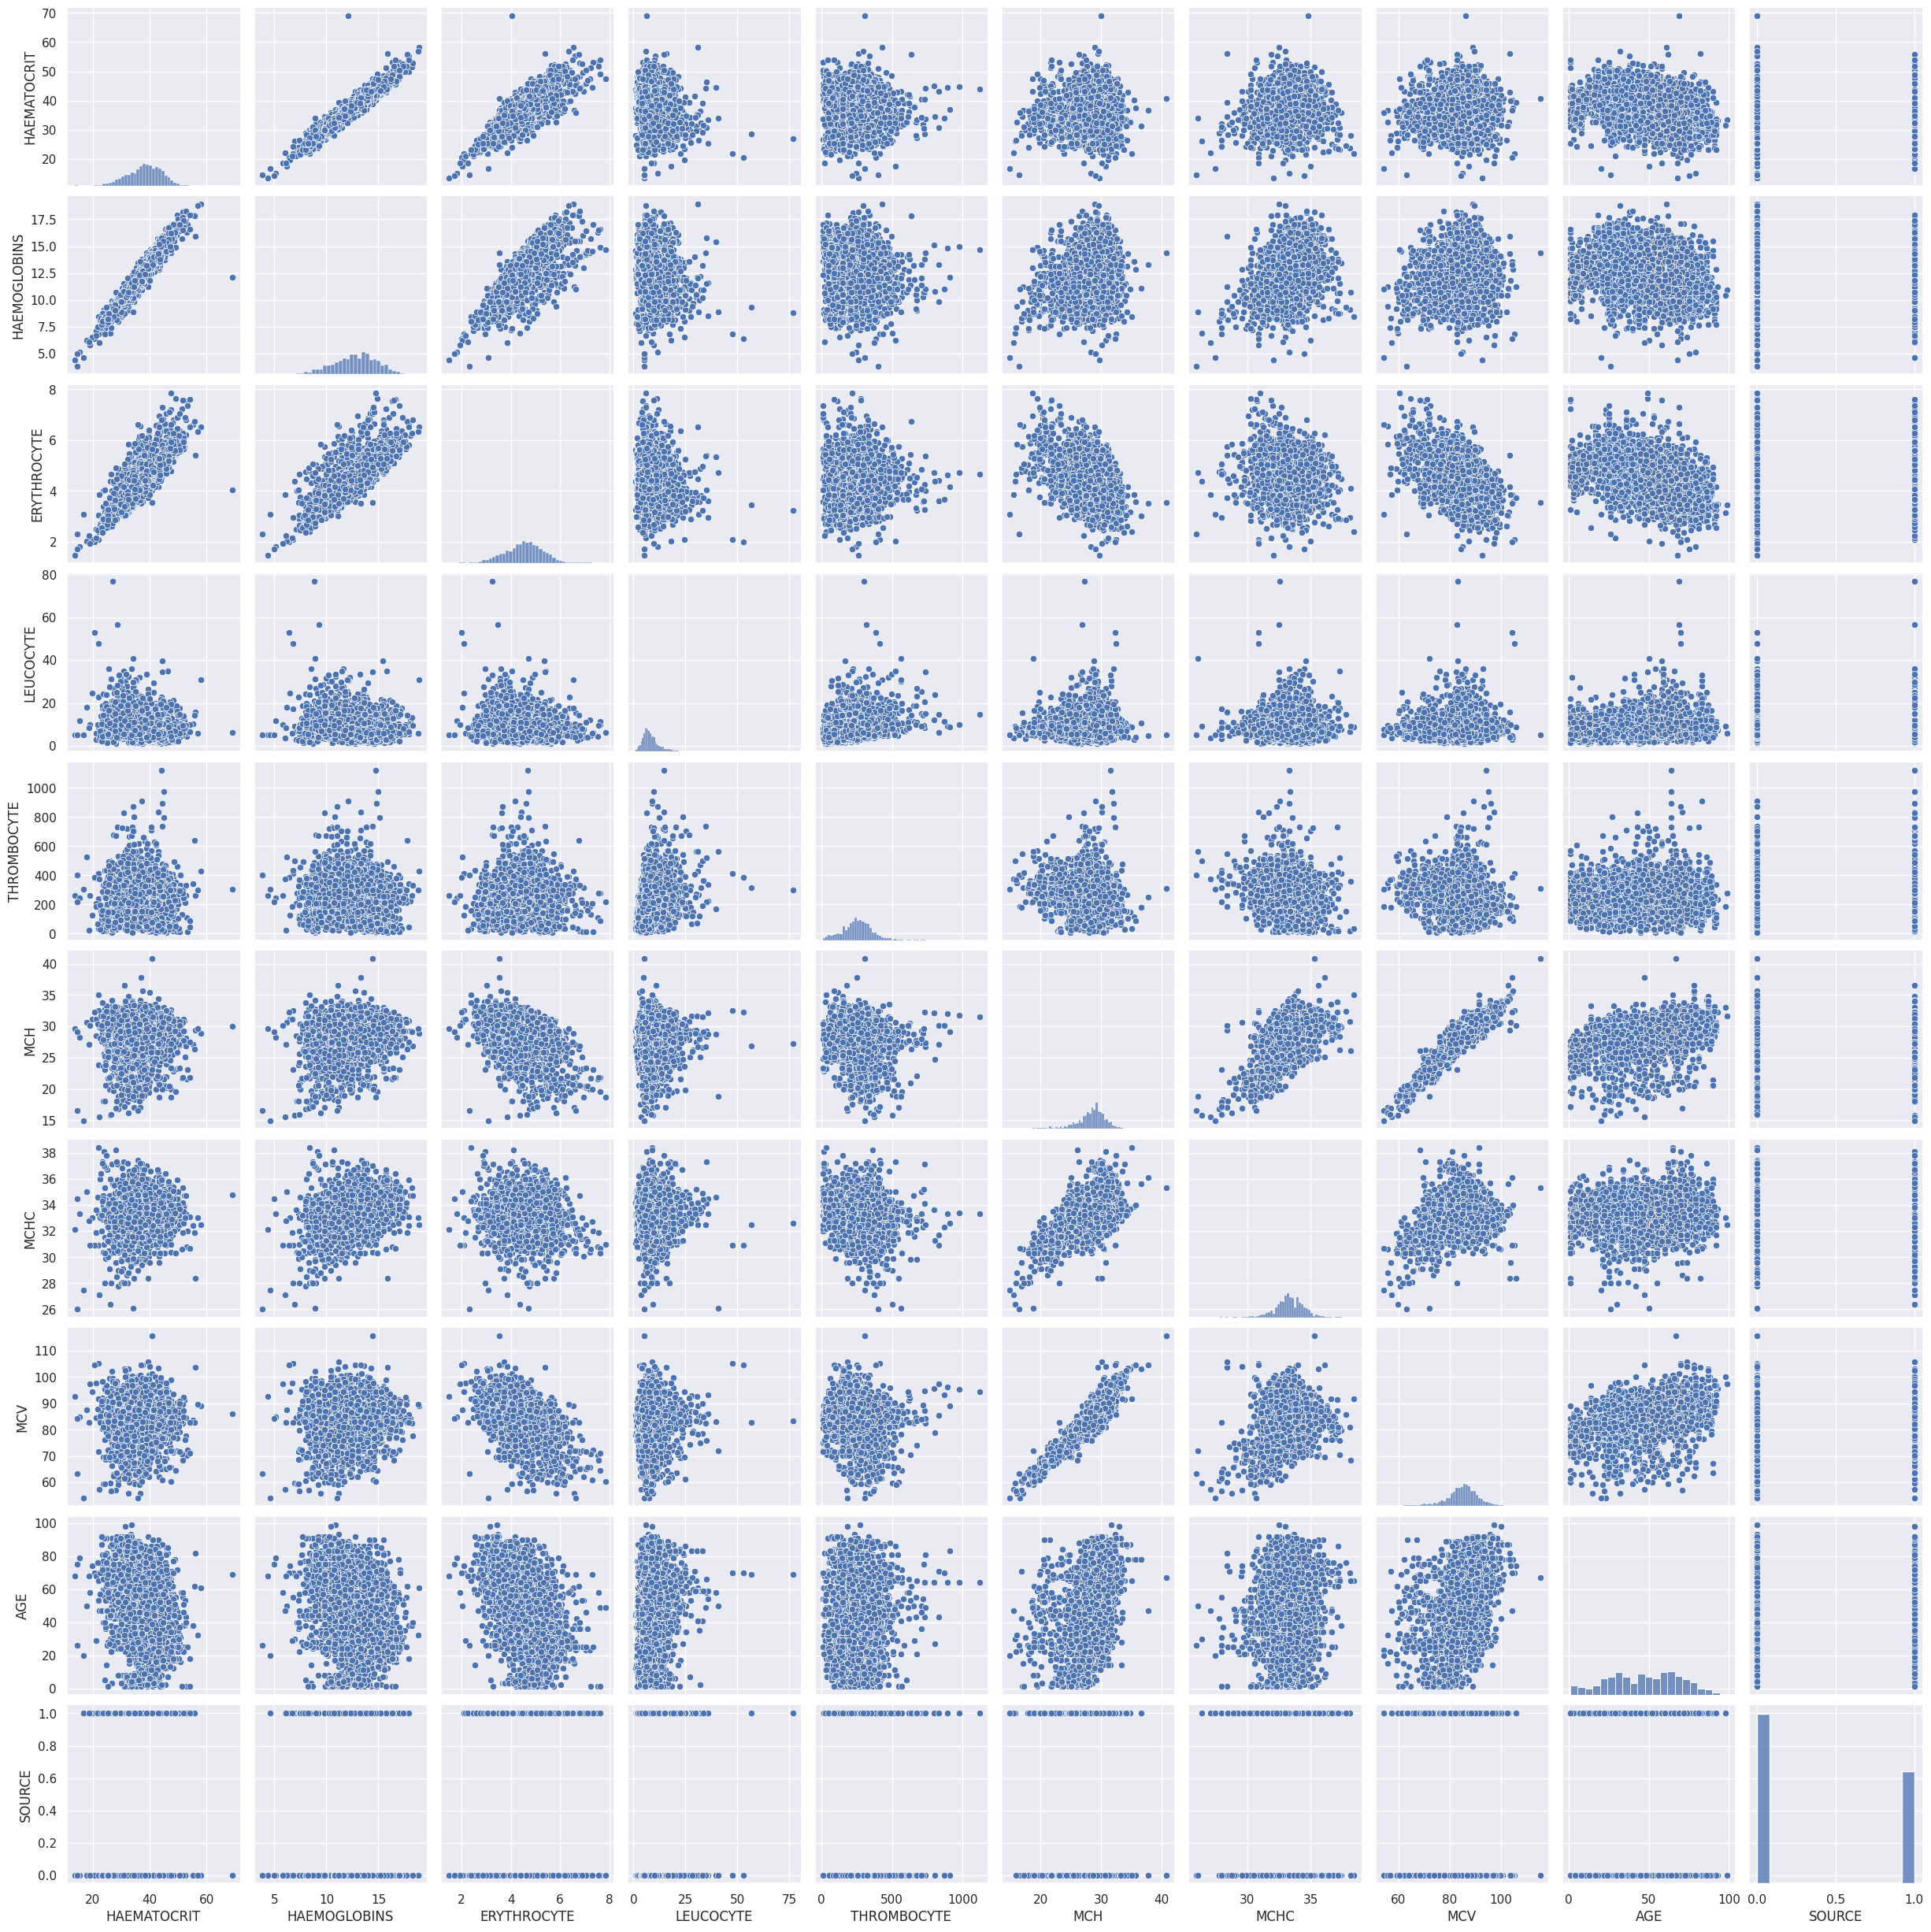

In [ ]:
# creating a matrix of scatterplots to visualize pairwise relationships between numerical variables in a DataFrame

sns.pairplot(df)

In [ ]:
# Calculate the correlation matrix

corr = df.corr()
corr.style.background_gradient(cmap='PuBu').set_precision(3)  # dark blue is highly correlated

In [ ]:
# Calculate the correlation matrix

cor = df.corr() # correlation
cor

HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE  \
HAEMATOCRIT      1.000000      0.971871     0.861447  -0.213708    -0.006062   
HAEMOGLOBINS     0.971871      1.000000     0.815221  -0.202026    -0.044982   
ERYTHROCYTE      0.861447      0.815221     1.000000  -0.185148     0.022771   
LEUCOCYTE       -0.213708     -0.202026    -0.185148   1.000000     0.282004   
THROMBOCYTE     -0.006062     -0.044982     0.022771   0.282004     1.000000   
MCH              0.091311      0.211015    -0.380908  -0.007652    -0.133466   
MCHC             0.125880      0.331856    -0.034858   0.010402    -0.188588   
MCV              0.056896      0.107450    -0.438664  -0.011583    -0.076347   
AGE             -0.257839     -0.241170    -0.421525   0.190361     0.024690   
SOURCE          -0.272349     -0.254954    -0.238046   0.139689    -0.229550   

                   MCH      MCHC       MCV       AGE    SOURCE  
HAEMATOCRIT   0.091311  0.125880  0.056896 -0.257839 -0.272349  
HAEMOGLOBINS  0.211015  0.331856  0.107450 -0.241170 -0.254954  
ERYTHROCYTE  -0.380908 -0.034858 -0.438664 -0.421525 -0.238046  
LEUCOCYTE    -0.007652  0.010402 -0.011583  0.190361  0.139689  
THROMBOCYTE  -0.133466 -0.188588 -0.076347  0.024690 -0.229550  
MCH           1.000000  0.592997  0.931807  0.360716 -0.002167  
MCHC          0.592997  1.000000  0.263571  0.048137  0.026026  
MCV           0.931807  0.263571  1.000000  0.405839 -0.013600  
AGE           0.360716  0.048137  0.405839  1.000000  0.113494  
SOURCE       -0.002167  0.026026 -0.013600  0.113494  1.000000

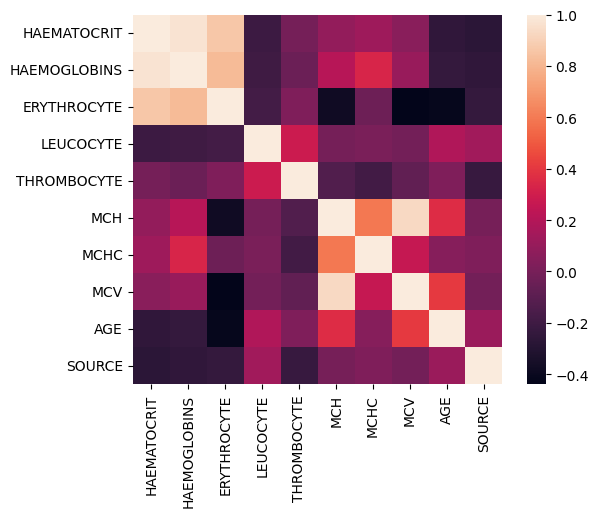

In [ ]:
# heatmap represent color-encoded matrix

ax = sns.heatmap(df.corr(), square=True) # square=True  OR  annot=True
plt.show()
# annot =True for displaying the no.s as well , lighter color is strong correlation and darker is no correlation, b/w independent variable there should be no correlation

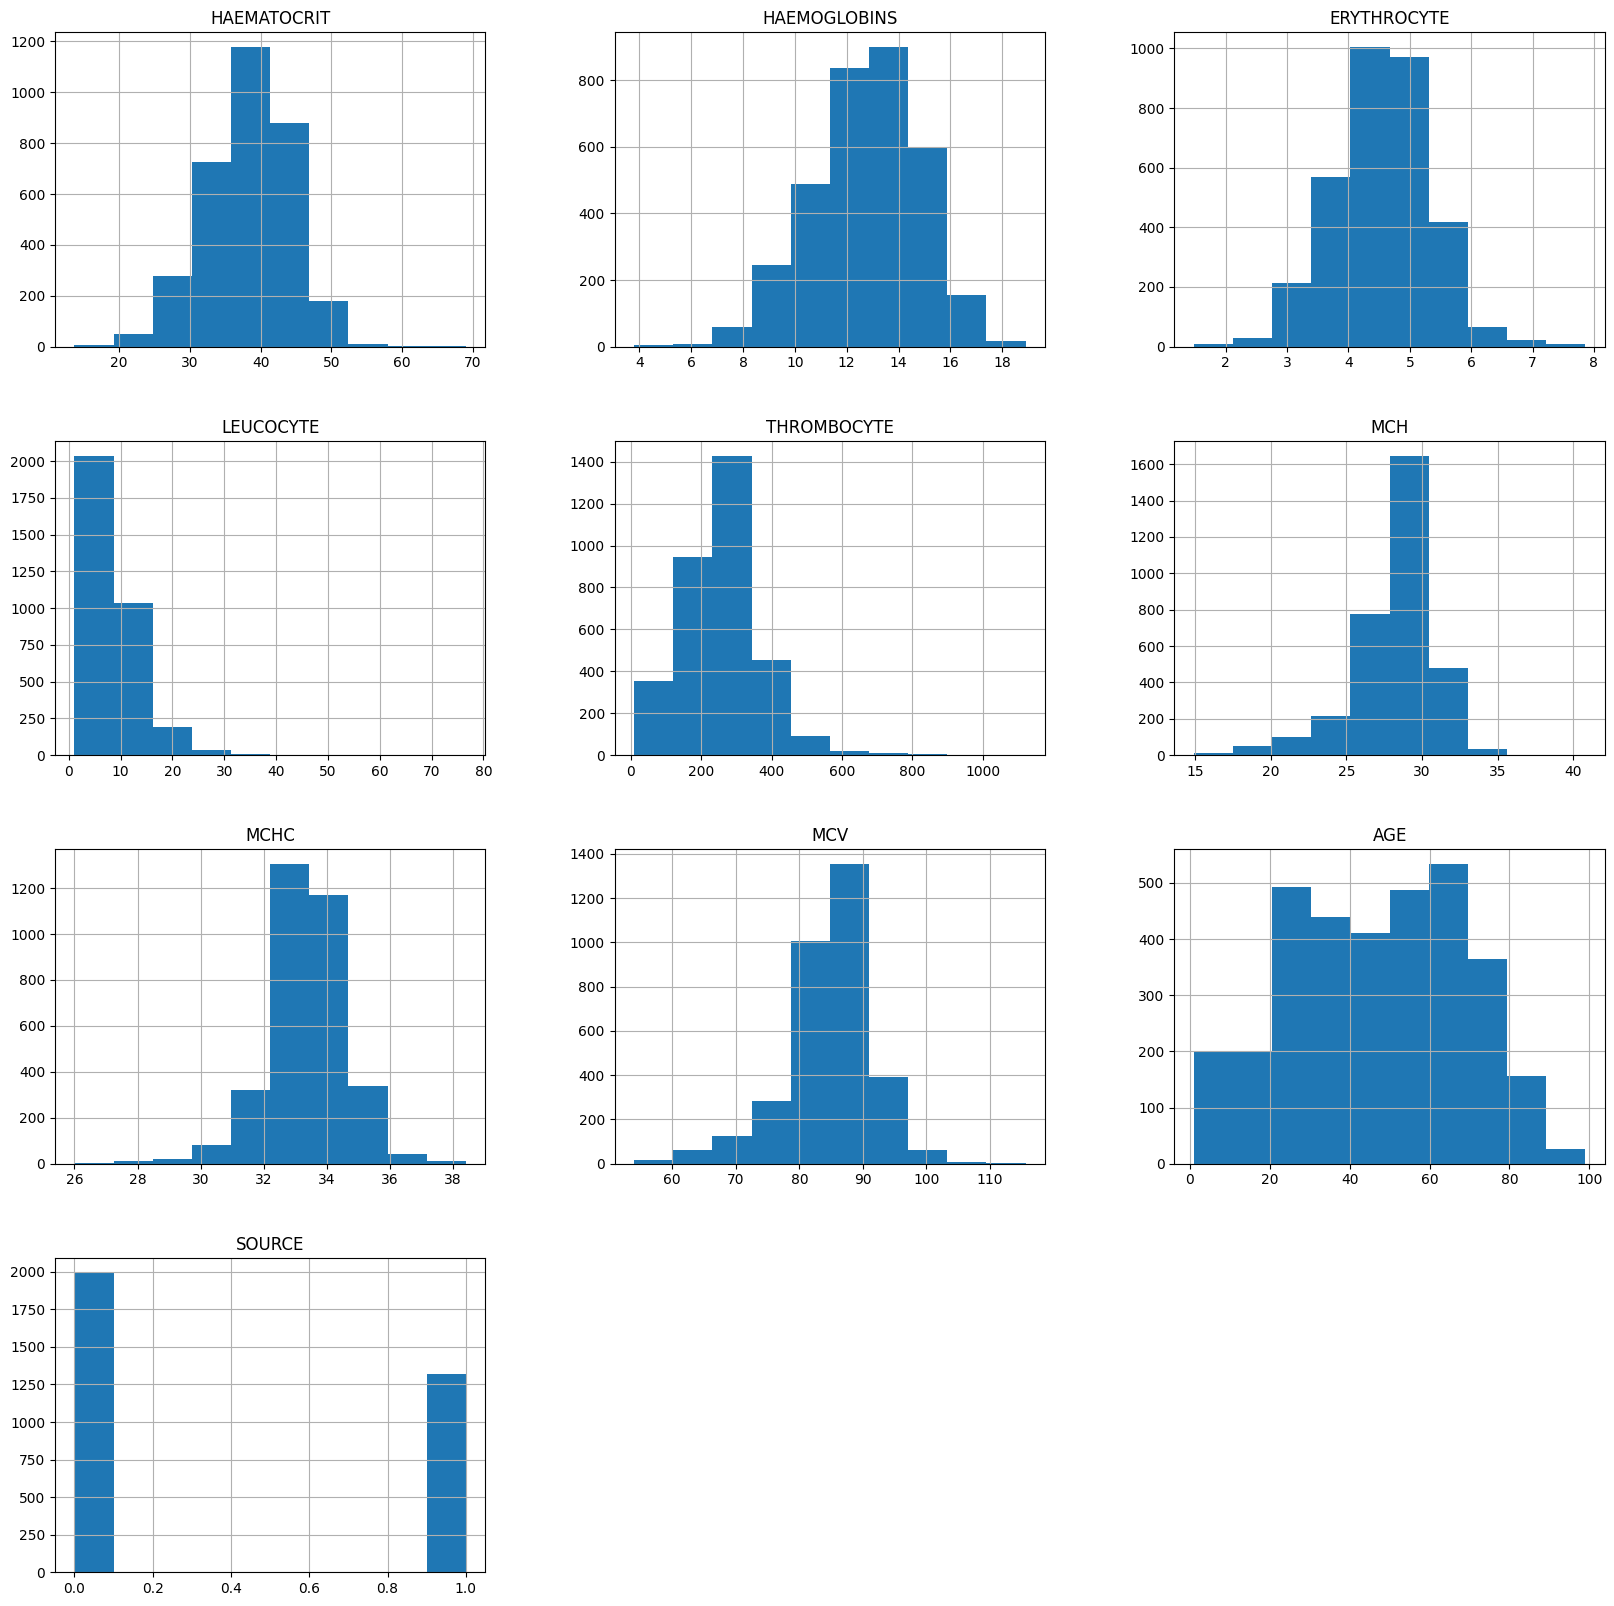

In [ ]:
'''
hist command is for histogram is a graphical representation of the distribution of a dataset, showing the frequency or count of values in different bins
help to understand the central tendency, dispersion, and shape of the distribution of each column in your dataset

'''

df.hist(figsize = (20, 20))
plt.show()

In [ ]:
"""
Installing sweetviz
Sweetviz is a Python library that generates a quick and easy way to perform exploratory data analysis (EDA) by generating visualizations
that highlight the differences and relationships between datasets.

"""
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 79.5 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)


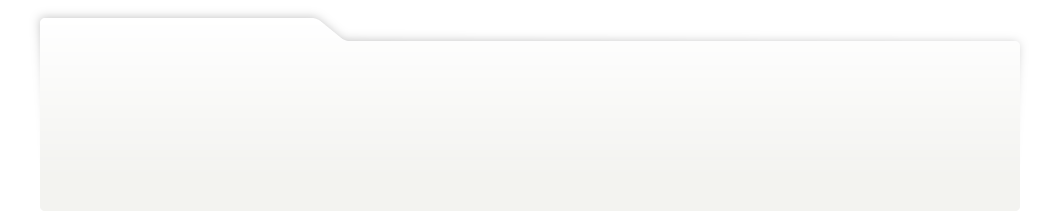
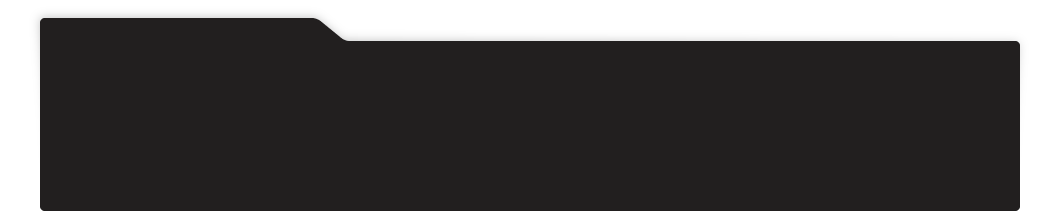
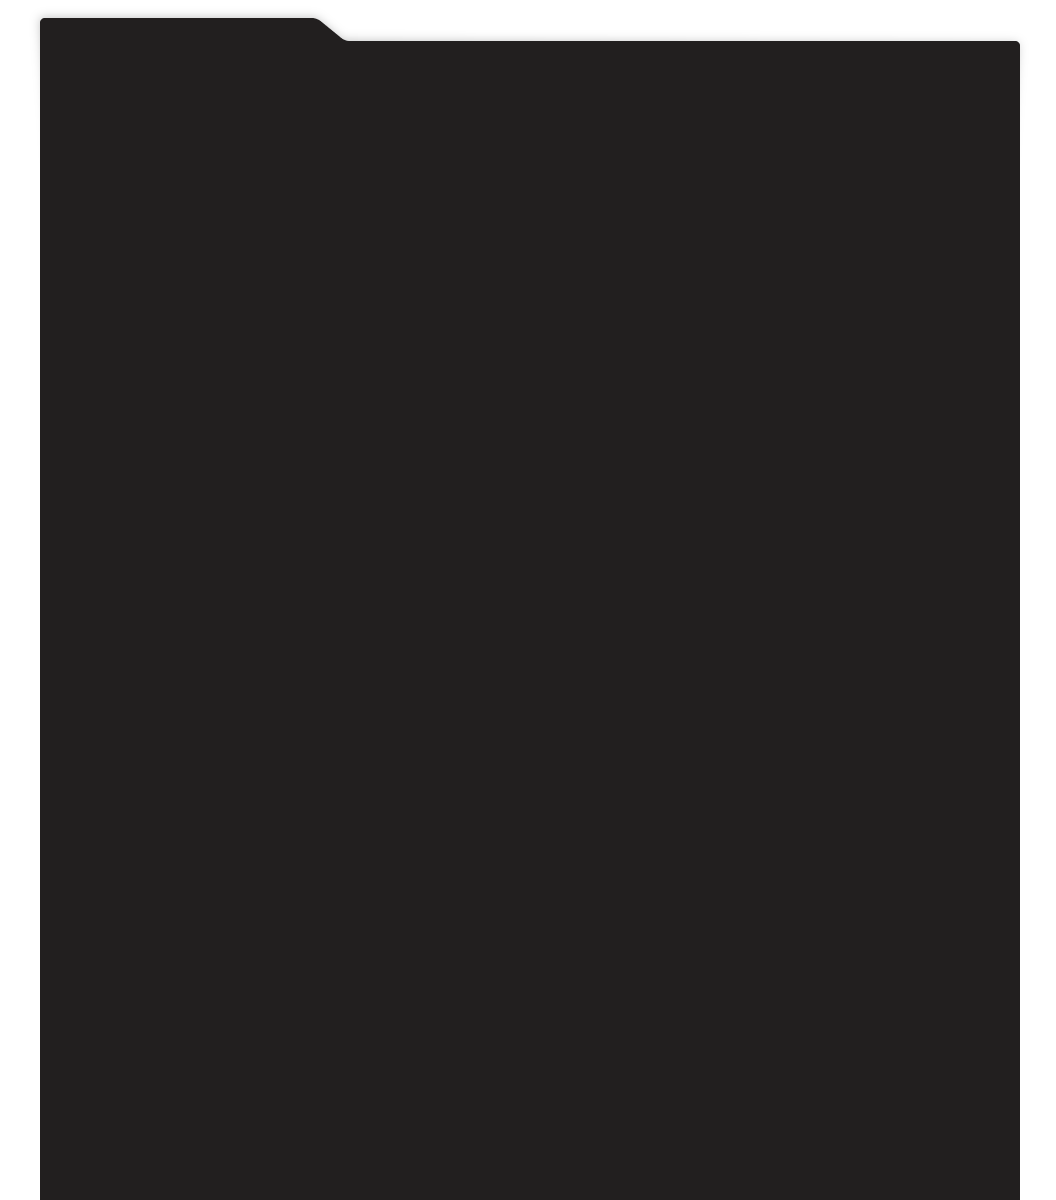
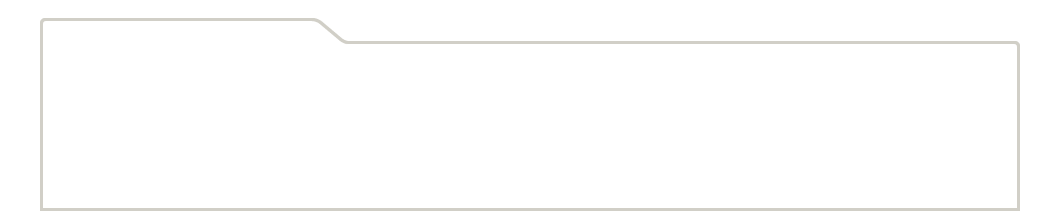
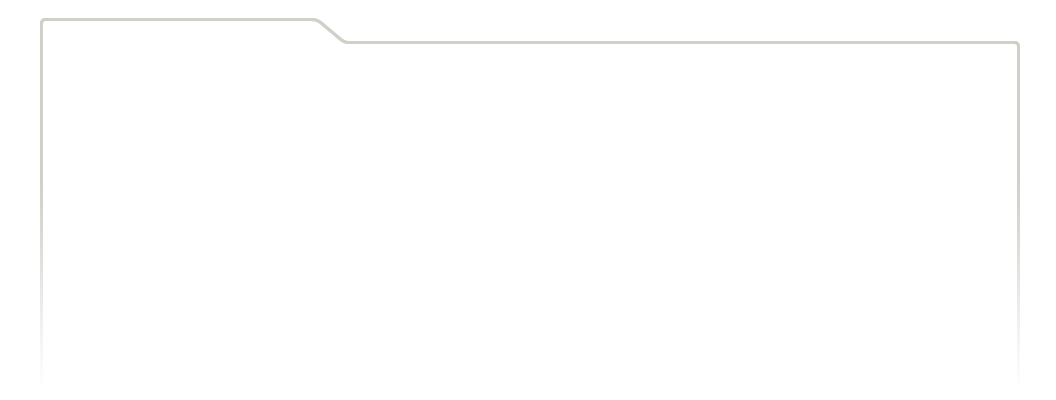
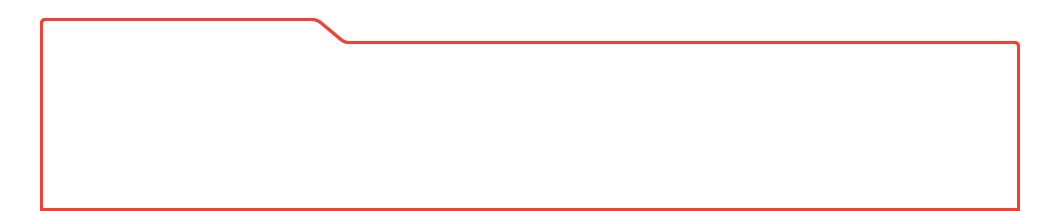
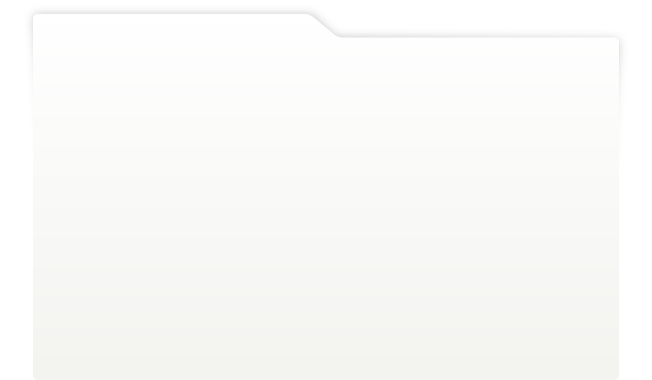
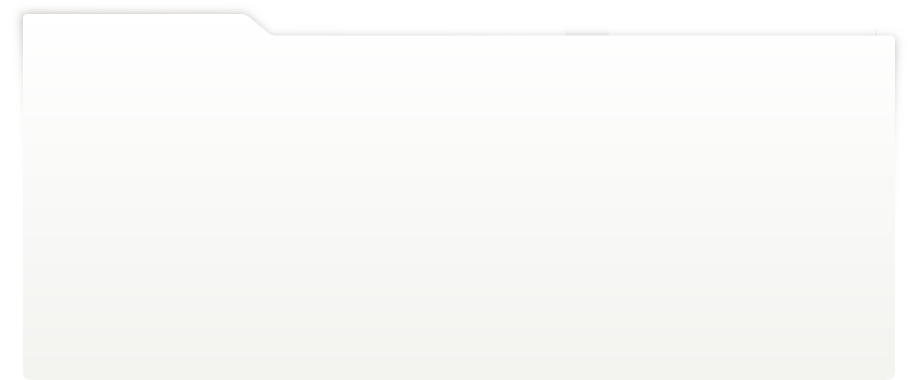
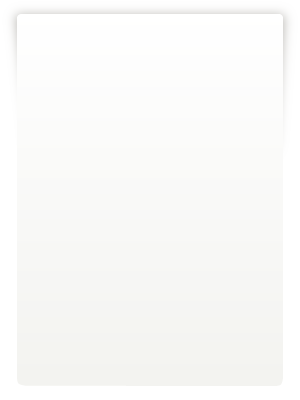
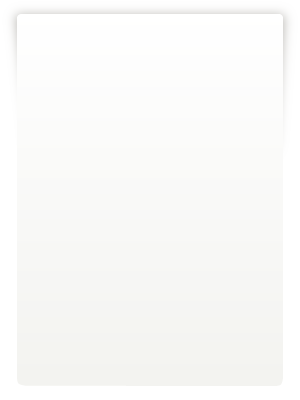
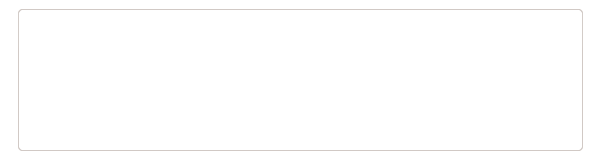
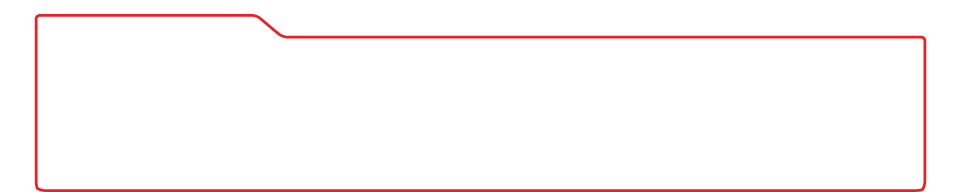
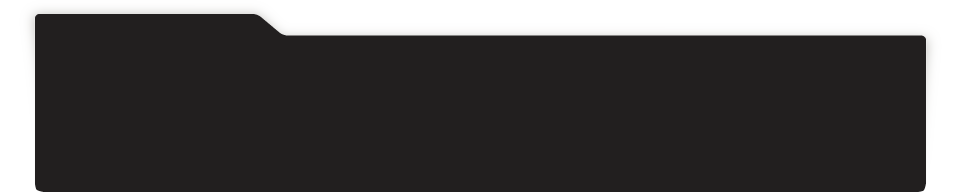
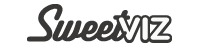
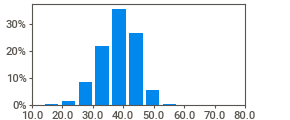
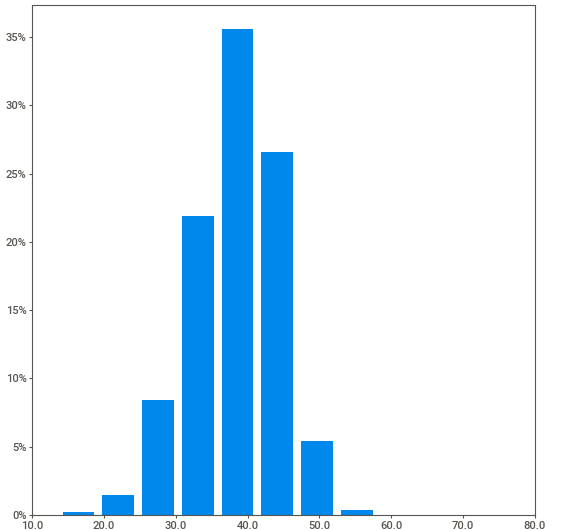
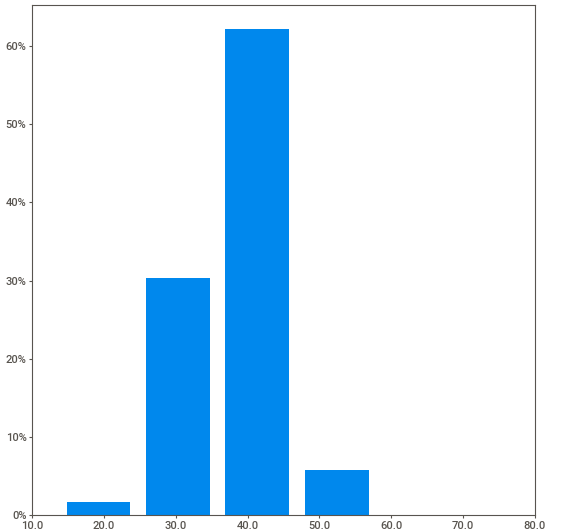
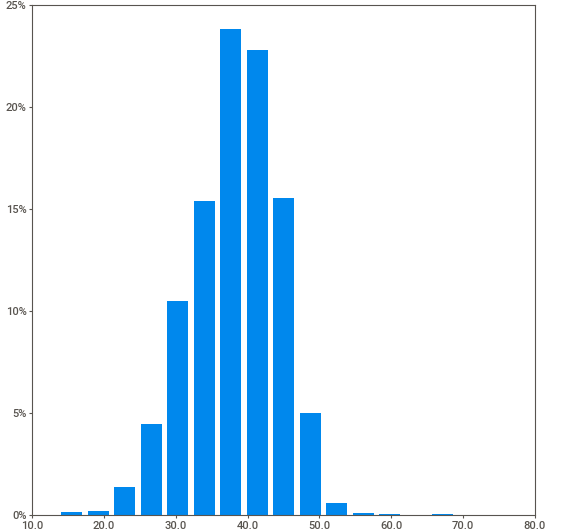
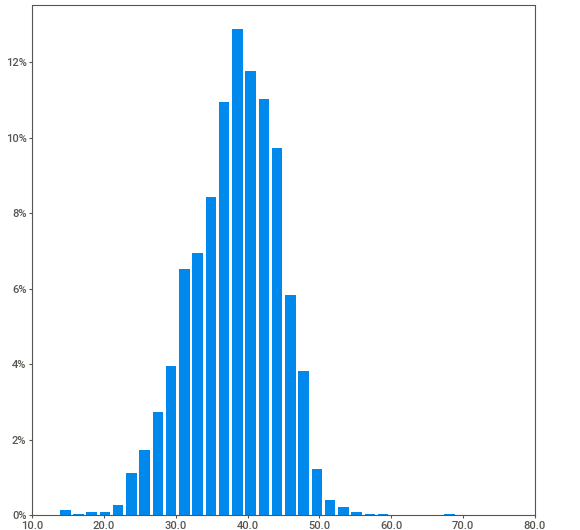
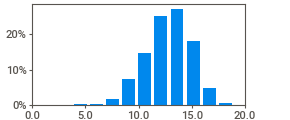
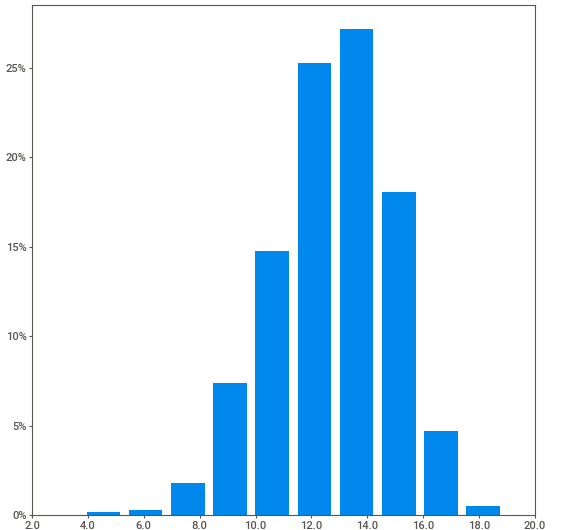
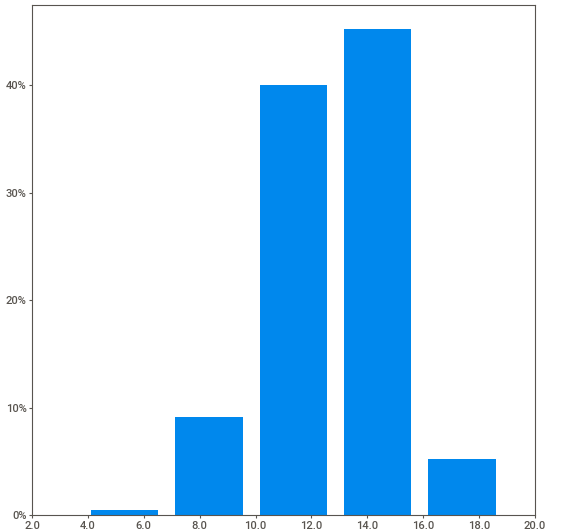
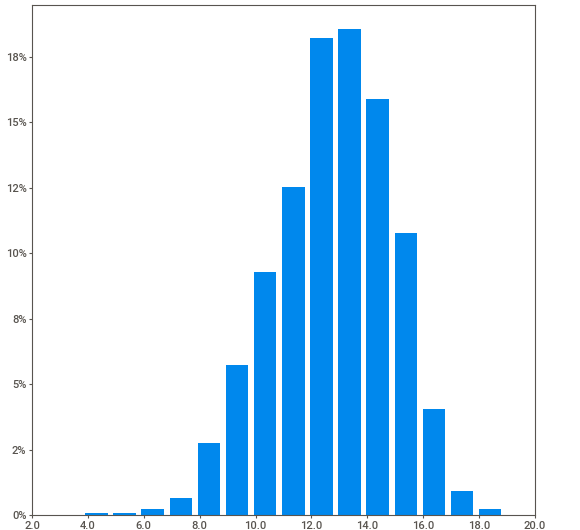
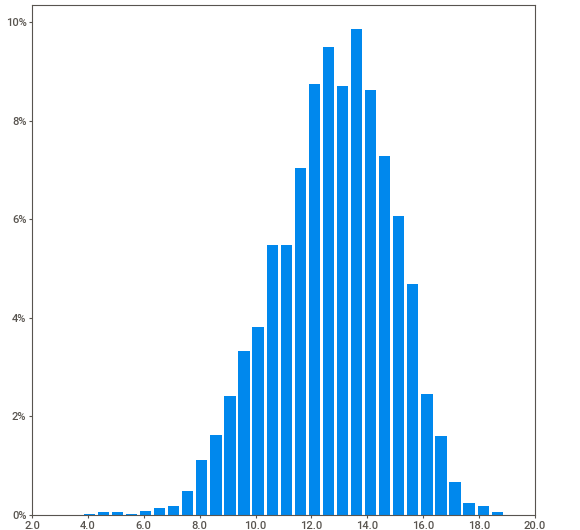
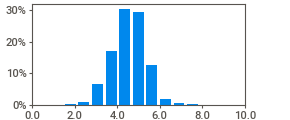
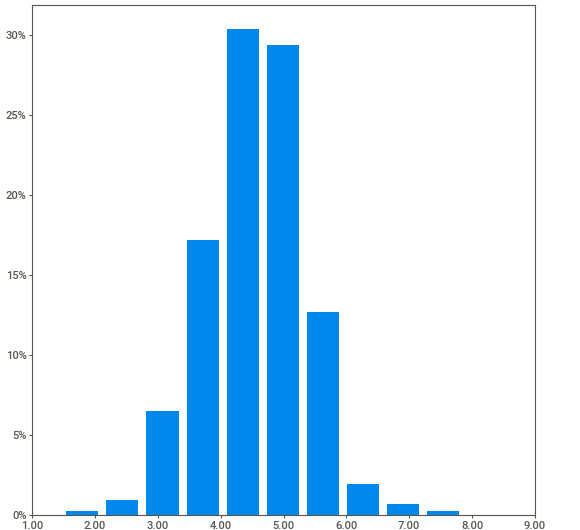
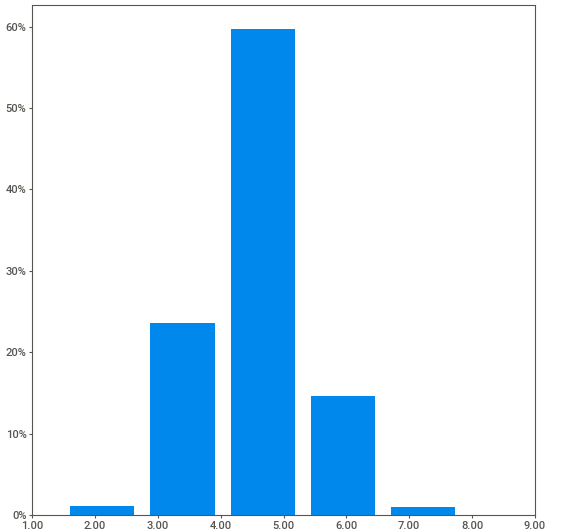
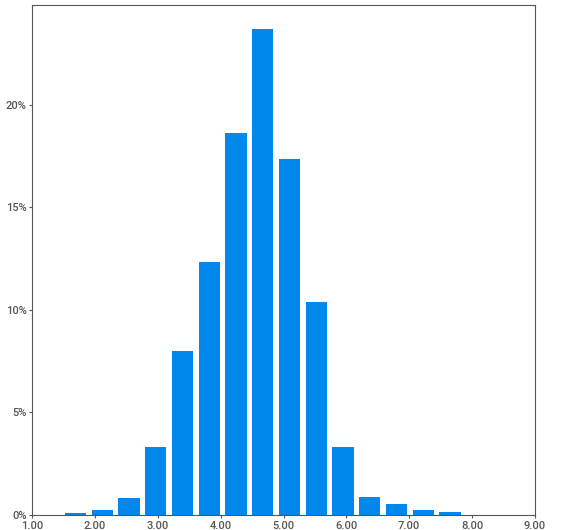
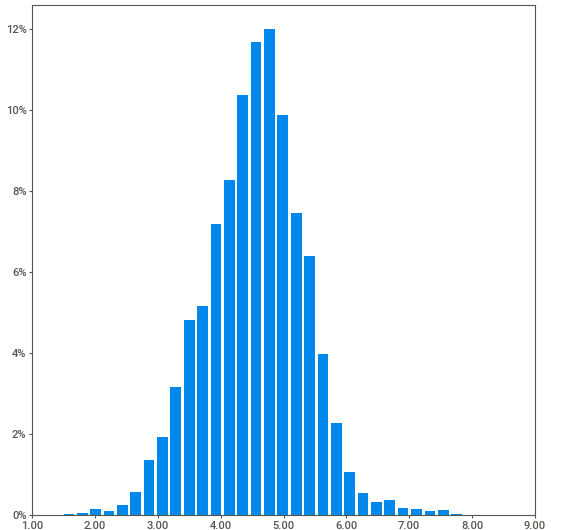
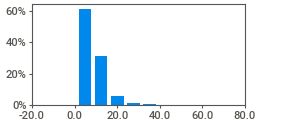
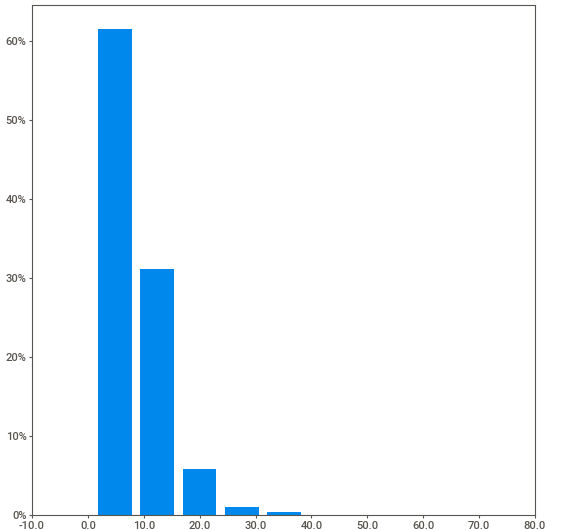
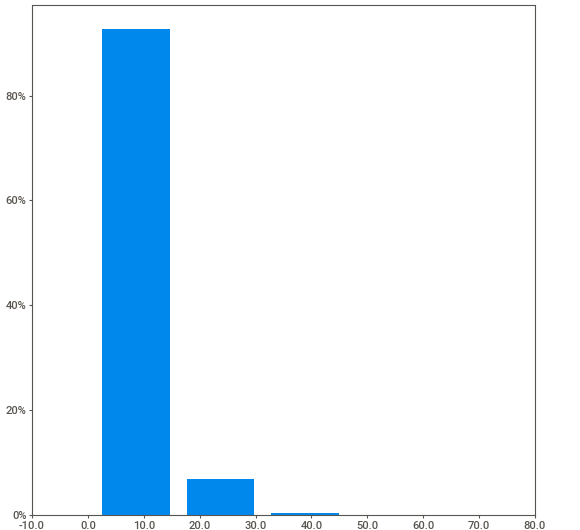
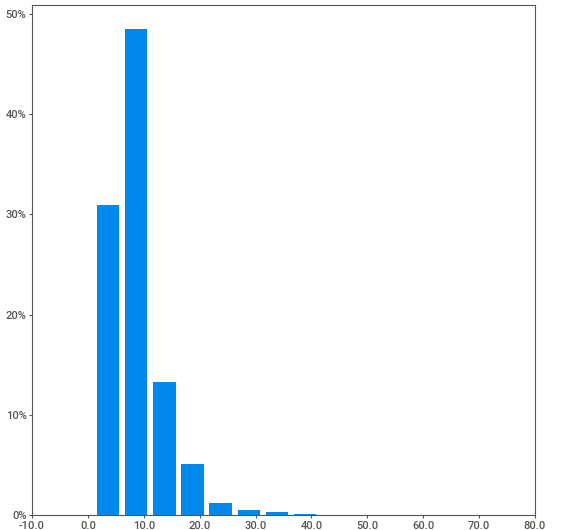
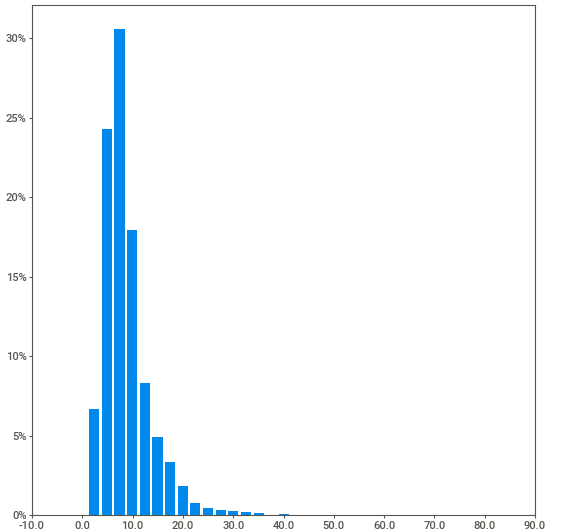
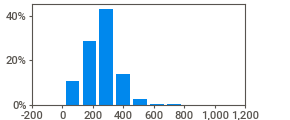
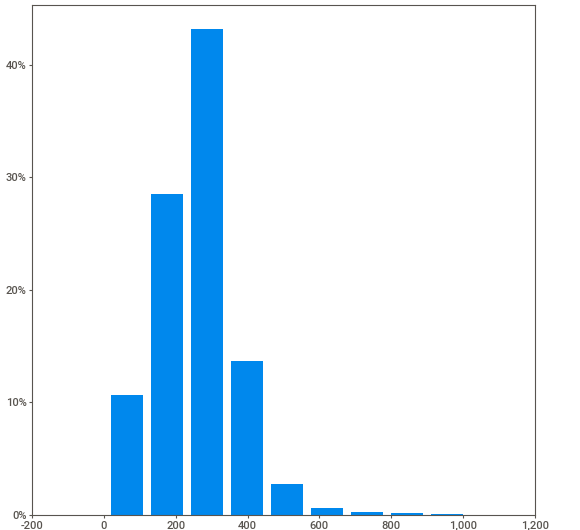
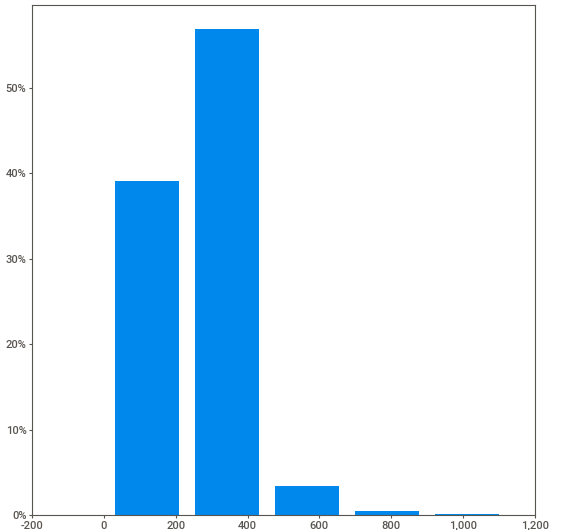
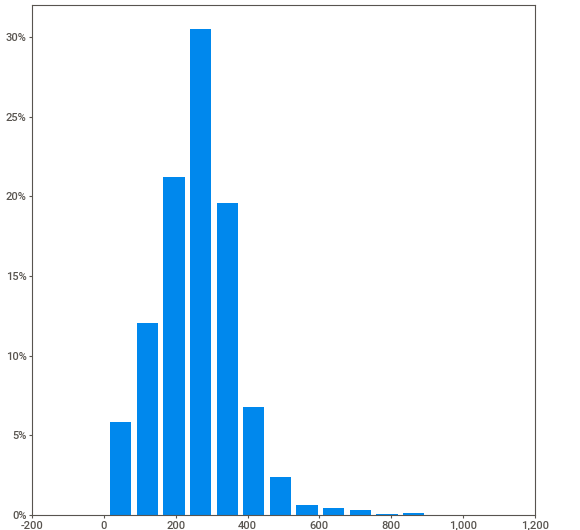
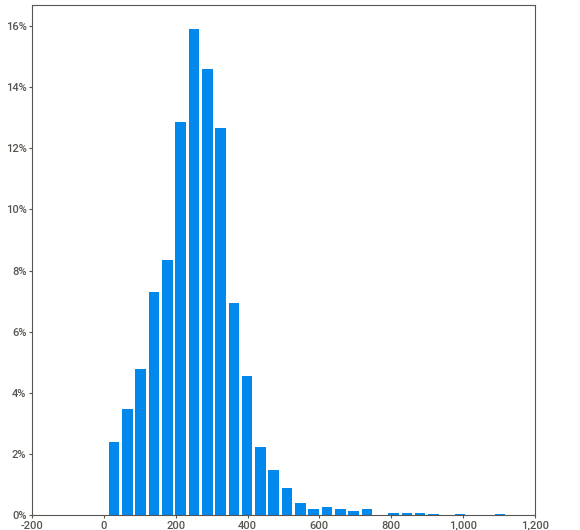
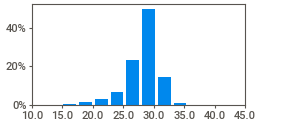
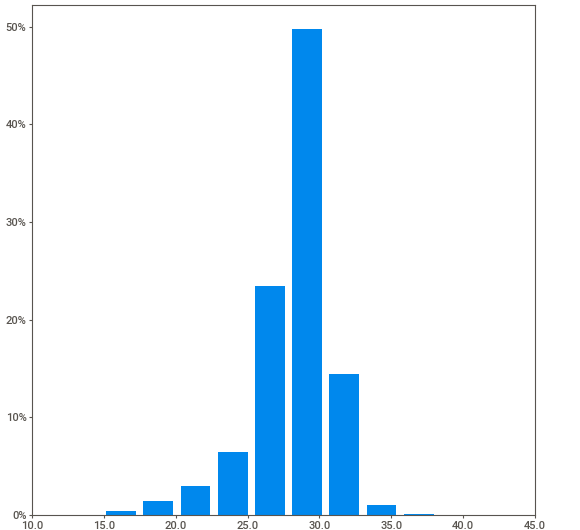
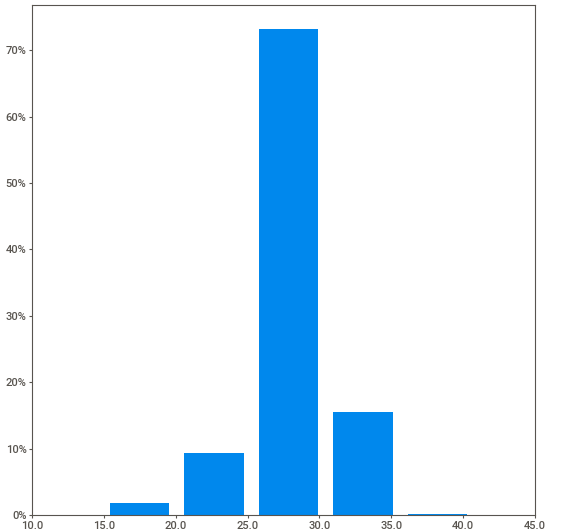
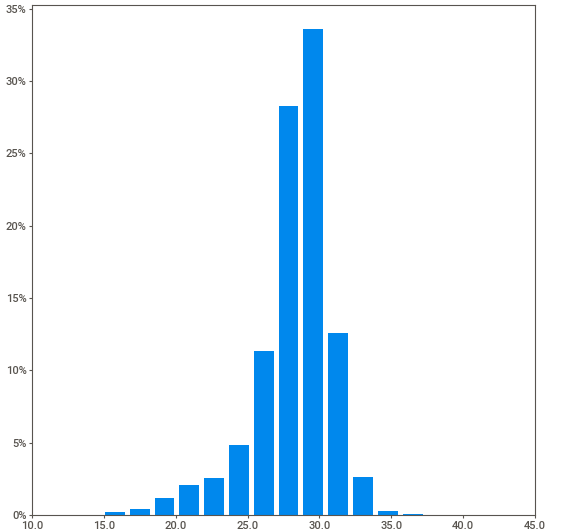
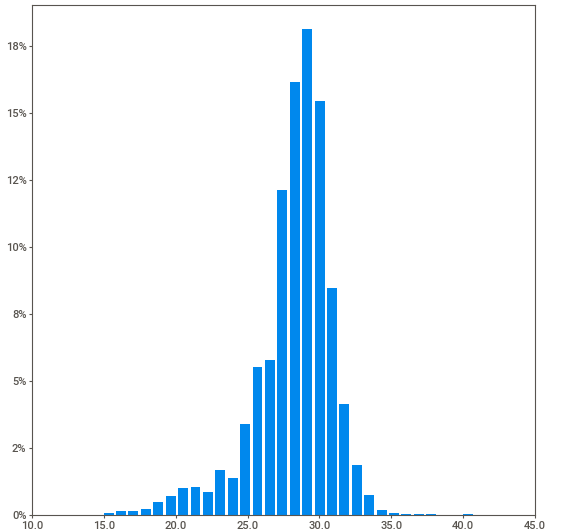
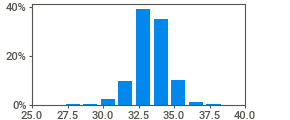
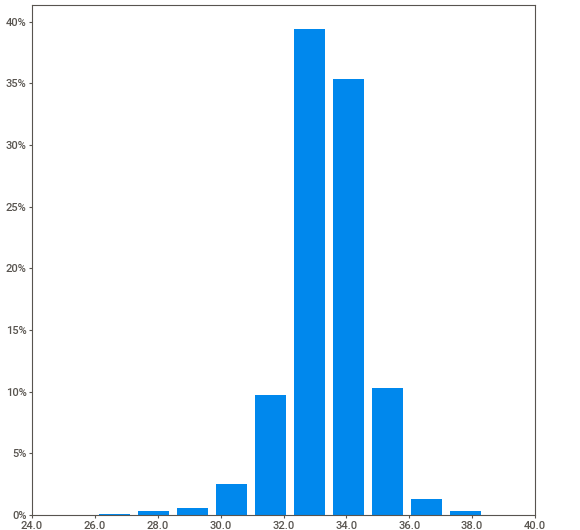
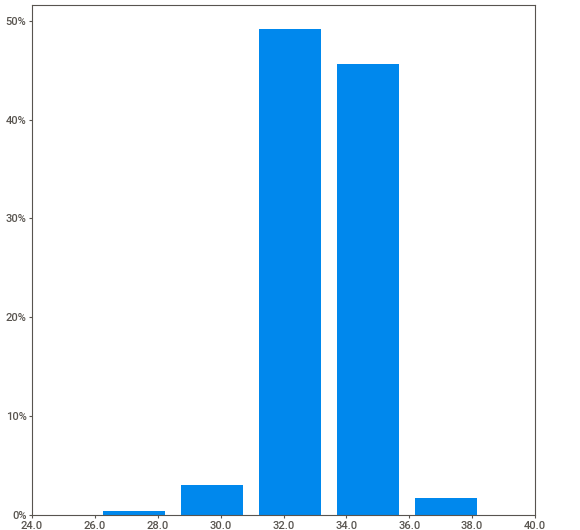
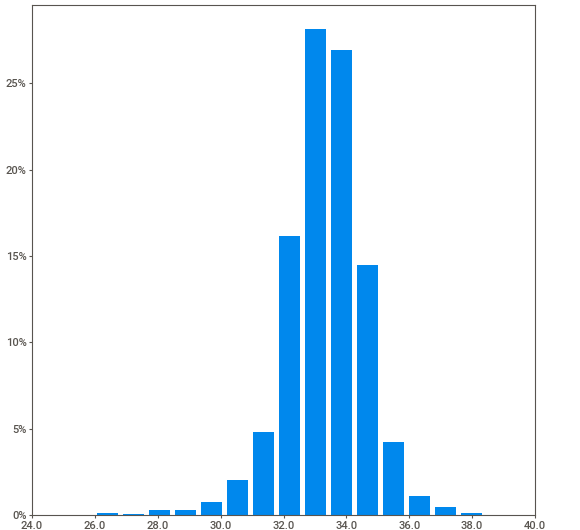
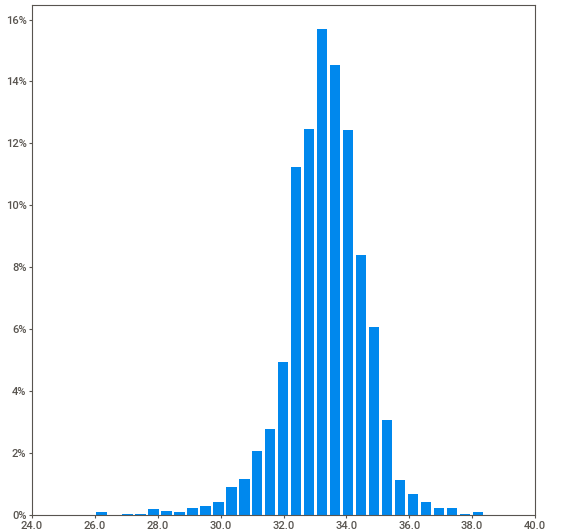
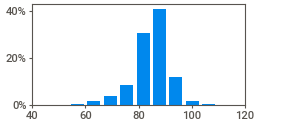
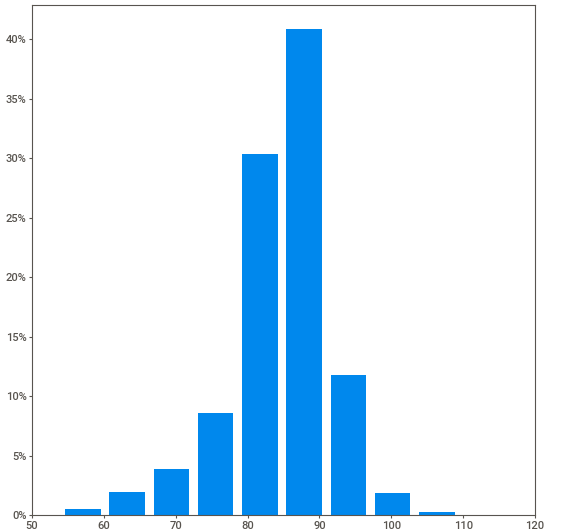
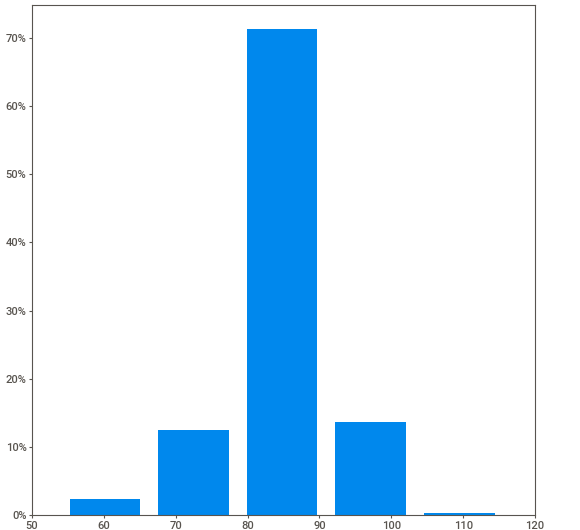
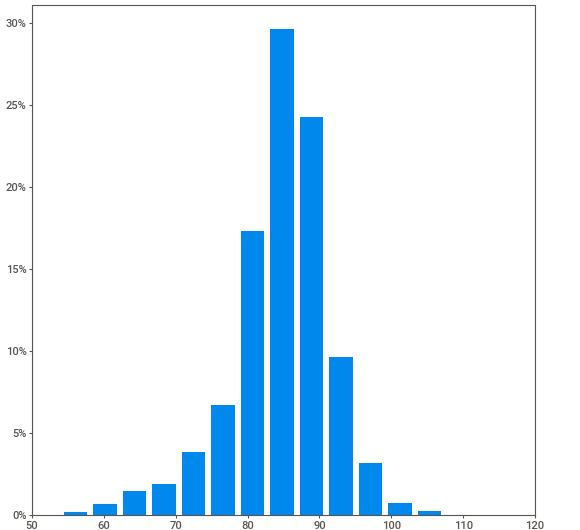
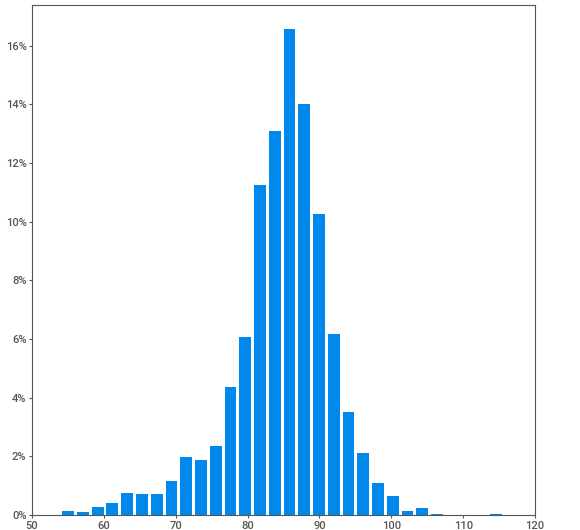
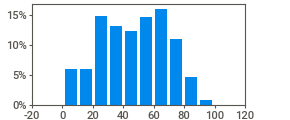
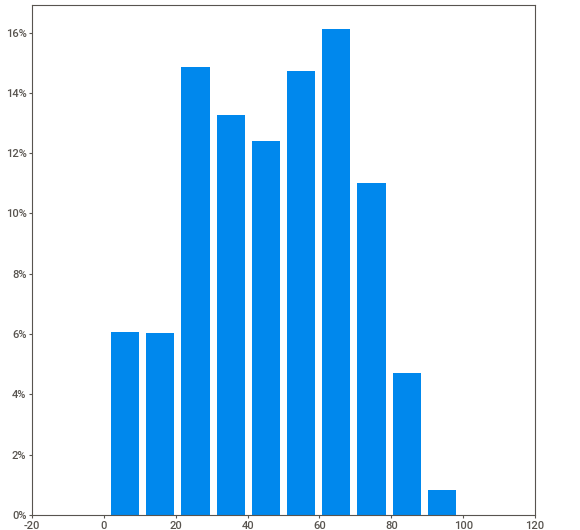
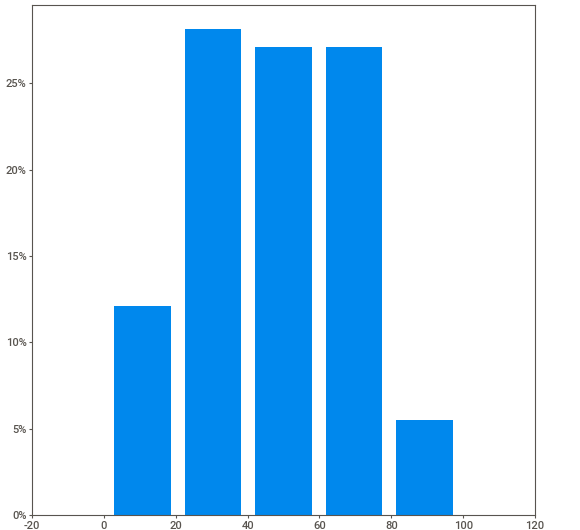
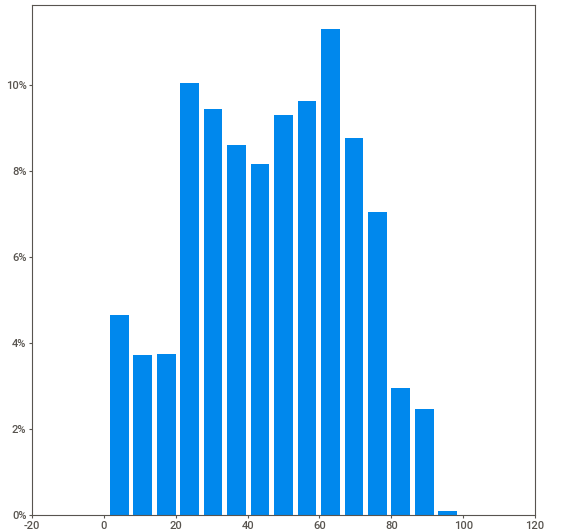
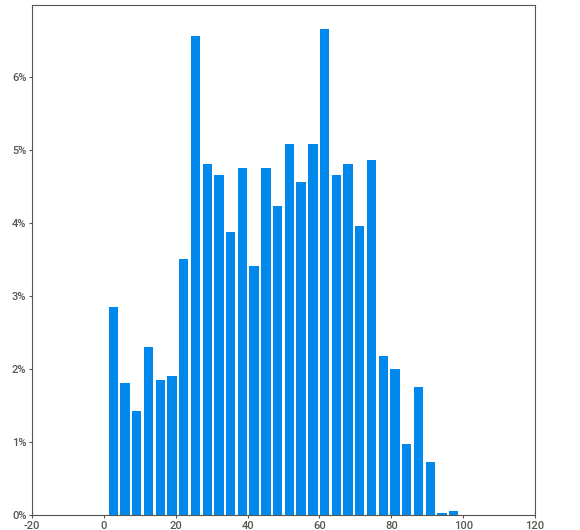
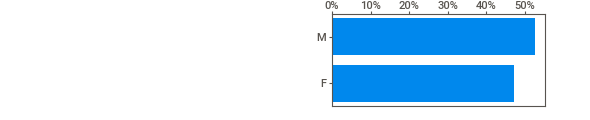
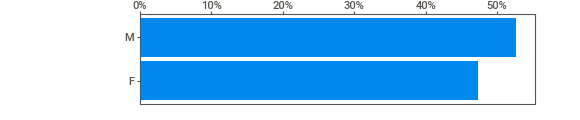
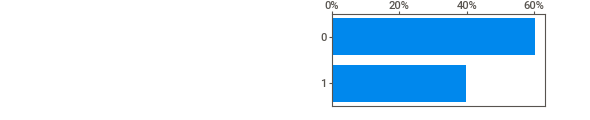
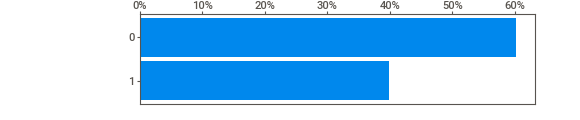
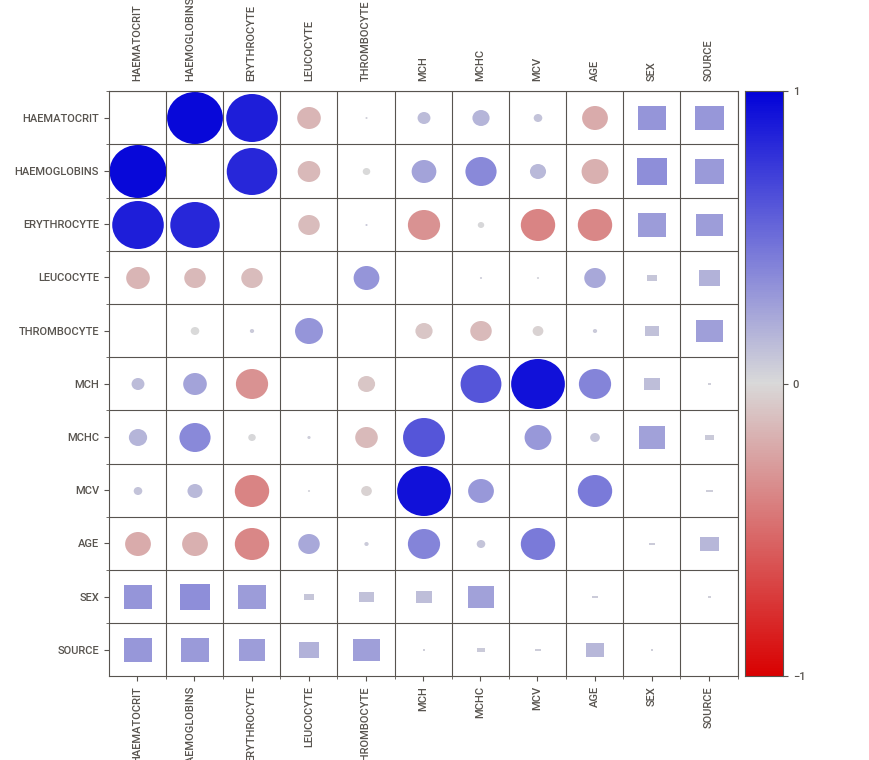
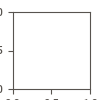

In [ ]:
# sweetviz report

import sweetviz as sv
sv_report = sv.analyze(df)

# sv_report.show_html('sv_rpt.html')  # explicitly sv_rpt.html will generate
sv_report.show_notebook()

In [ ]:
df.head()

HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  MCHC  \
0         33.8          11.1         4.18        4.6          150  26.6  32.8   
1         44.6          14.0         6.86        6.3          232  20.4  31.4   
2         42.9          14.0         4.57        6.2          336  30.6  32.6   
3         41.9          14.4         4.67        3.5          276  30.8  34.4   
4         40.6          13.3         4.85       14.9          711  27.4  32.8   

    MCV  AGE SEX  SOURCE  
0  80.9   33   F       1  
1  65.0   36   M       0  
2  93.9   70   F       0  
3  89.7   18   F       0  
4  83.7   36   M       0

In [ ]:
# summarising count of SOURCE / Target column

source_status=df['SOURCE'].value_counts()
source_status

0    1992
1    1317
Name: SOURCE, dtype: int64

Text(0.5, 1.0, 'SOURCE Distributions \n (0: No Treatment required || 1: Treatment required)')

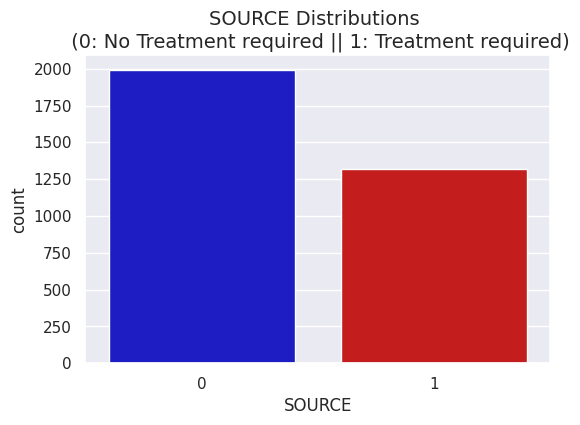

In [ ]:
# displaying the count of SOURCE column

width = 6
height = 4
sns.set(rc = {'figure.figsize':(width,height)})

colors = ["#0101DF", "#DF0101"]

sns.countplot(x='SOURCE', data=df, palette=colors)
plt.title('SOURCE Distributions \n (0: No Treatment required || 1: Treatment required)' , fontsize=14) #

In [ ]:
# getting count % of SOURCE column

print('No Treatment req.', round(df['SOURCE'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Treatment req.', round(df['SOURCE'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Treatment req. 60.2 % of the dataset
Treatment req. 39.8 % of the dataset


In [ ]:
# getting count % of SOURCE column

Treatment_N = round((source_status[0]/df['SOURCE'].count() * 100),2)
print(Treatment_N,'%')

Treatment_Y = round((source_status[1]/df['SOURCE'].count() * 100),2)
print(Treatment_Y,"%")

60.2 %
39.8 %


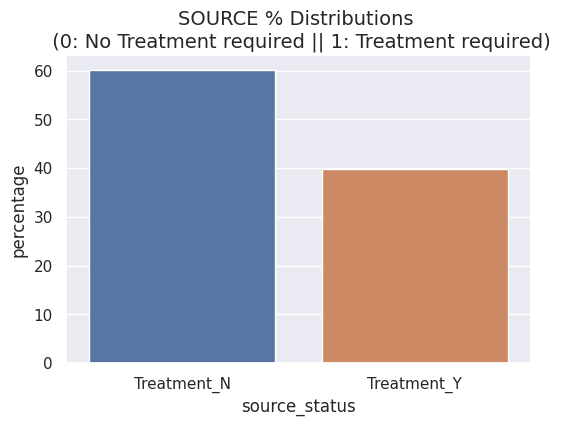

In [ ]:
# displaying count % of SOURCE column

status_percentage={'source_status':['Treatment_N','Treatment_Y'],'percentage':[Treatment_N,Treatment_Y]}
df_status_percentage=pd.DataFrame(status_percentage)

sns.barplot(x='source_status',y='percentage', data=df_status_percentage)
plt.title('SOURCE % Distributions \n (0: No Treatment required || 1: Treatment required)' , fontsize=14)
plt.show()

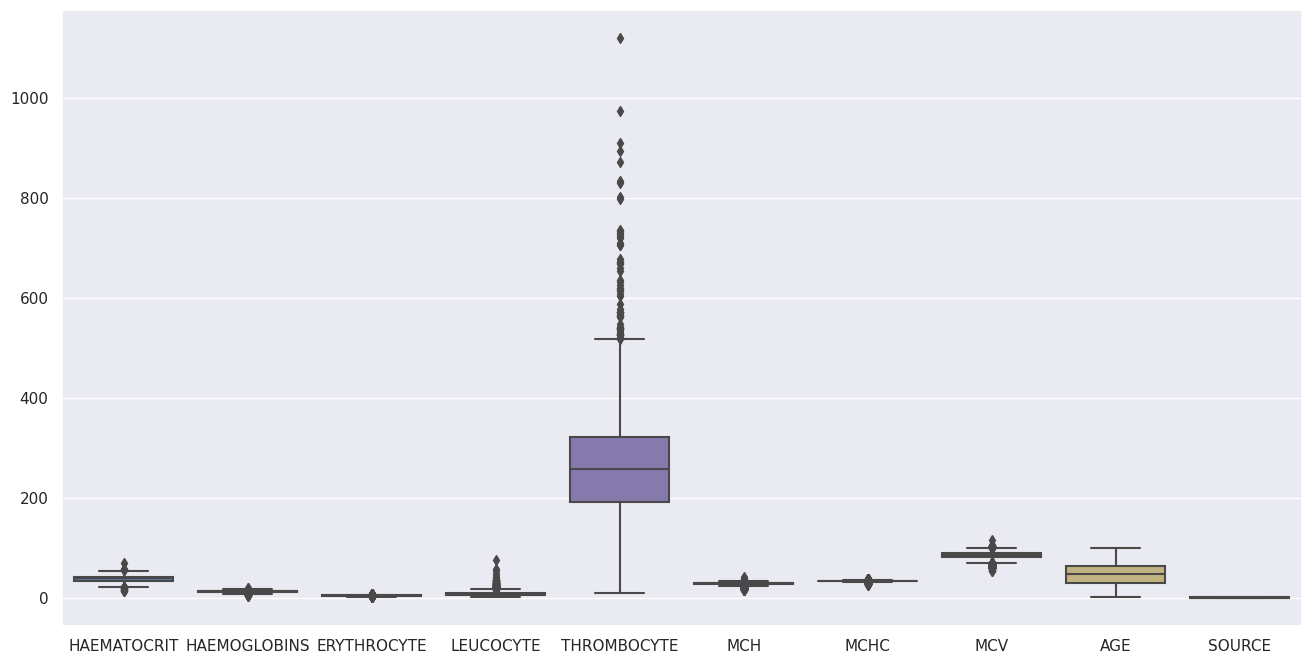

In [ ]:
# Determine Outlier

width = 16
height = 8
sns.set(rc = {'figure.figsize':(width,height)})

sns.boxplot(data=df,whis=1.5)
plt.show()

In [ ]:
df.head()

HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  MCHC  \
0         33.8          11.1         4.18        4.6          150  26.6  32.8   
1         44.6          14.0         6.86        6.3          232  20.4  31.4   
2         42.9          14.0         4.57        6.2          336  30.6  32.6   
3         41.9          14.4         4.67        3.5          276  30.8  34.4   
4         40.6          13.3         4.85       14.9          711  27.4  32.8   

    MCV  AGE SEX  SOURCE  
0  80.9   33   F       1  
1  65.0   36   M       0  
2  93.9   70   F       0  
3  89.7   18   F       0  
4  83.7   36   M       0

# ONE HOT ENCODING

In [ ]:
# Applying One Hot Encoding and generating gender as column

df['gender']=pd.get_dummies(data=df['SEX'], drop_first=True)
df.head()

HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  MCHC  \
0         33.8          11.1         4.18        4.6          150  26.6  32.8   
1         44.6          14.0         6.86        6.3          232  20.4  31.4   
2         42.9          14.0         4.57        6.2          336  30.6  32.6   
3         41.9          14.4         4.67        3.5          276  30.8  34.4   
4         40.6          13.3         4.85       14.9          711  27.4  32.8   

    MCV  AGE SEX  SOURCE  gender  
0  80.9   33   F       1       0  
1  65.0   36   M       0       1  
2  93.9   70   F       0       0  
3  89.7   18   F       0       0  
4  83.7   36   M       0       1

In [ ]:
# importing libraries for Training Model

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.decomposition import PCA


In [ ]:
# Independent variable x

x=df.drop(['SEX','SOURCE'],axis=1)  # dropping SEX and Source as SEX has been encoded using 1 Hot encoding and Source is Target column
x.head()

HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  MCHC  \
0         33.8          11.1         4.18        4.6          150  26.6  32.8   
1         44.6          14.0         6.86        6.3          232  20.4  31.4   
2         42.9          14.0         4.57        6.2          336  30.6  32.6   
3         41.9          14.4         4.67        3.5          276  30.8  34.4   
4         40.6          13.3         4.85       14.9          711  27.4  32.8   

    MCV  AGE  gender  
0  80.9   33       0  
1  65.0   36       1  
2  93.9   70       0  
3  89.7   18       0  
4  83.7   36       1

In [ ]:
# target variable y

y=df['SOURCE']
y.head()

0    1
1    0
2    0
3    0
4    0
Name: SOURCE, dtype: int64

In [ ]:
# spliting the dataset into Train and Test based on 70:30 ratio

X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=10) # test size 30 %

In [ ]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training set and transform the "SOURCE" feature
X_train = scaler.fit_transform(X_train)

# Transform the "SOURCE" feature in the test set
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(2316, 10)

In [ ]:
X_train

array([[ 1.64110103e+00,  1.81411538e+00,  1.30174628e+00, ...,
         2.52741495e-01, -1.27731824e+00,  9.44540556e-01],
       [ 1.77678687e-03,  3.22689435e-01, -3.48835053e-01, ...,
         7.15754167e-01,  1.34387460e+00,  9.44540556e-01],
       [ 8.04711109e-01,  1.09245767e+00,  7.38757297e-01, ...,
        -8.00488635e-02,  2.40214458e-01,  9.44540556e-01],
       ...,
       [ 8.04711109e-01,  7.07573551e-01,  2.65334744e-01, ...,
         8.60445627e-01, -1.32330408e+00,  9.44540556e-01],
       [ 6.20705327e-01,  9.00015608e-01,  9.17890154e-01, ...,
        -7.02222142e-01, -1.73717663e+00,  9.44540556e-01],
       [-1.05207451e+00, -1.02440497e+00, -8.35052809e-01, ...,
        -3.69431784e-01, -4.95558972e-01,  9.44540556e-01]])

In [ ]:
y_train.shape

(2316,)

In [ ]:
X_test.shape

(993, 10)

In [ ]:
y_test.shape

(993,)

# LOGISTIC REGRESSION

In [ ]:
# instantiate Logistic regression and Fit it

logr=LogisticRegression()
logr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# making the model learn

y_pred=logr.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.6968781470292045

We will rely on acccuracy score

There are 3 more metrics:


Precision: It is the total no. of True positive and False Postive. Precision makes sure we don't spot good Health(treatment not required) as bad Health(treatment required) in our problem.


Recall: It is the total no. of True Positve and False Negative. Recall assures we don't predict bad Health(treatment required) as all good and thus get good accuracy with a terrible model.


F1: it is the harmonic mean of precision and recall. it makes a god avg between both the metrics


We will rely on F1 score

In [ ]:
f1_score(y_test,y_pred)

0.5519287833827894

In [ ]:
# Resetting Logistic Regression

logr=LogisticRegression()

## GRID SEARCH

In [ ]:
#Applying Grid Search to find the best parameter for our Logistic Regression
# params={'C':[0.001,0.01,0.1,1,10,100,1000]}

# defin hyperparameter to search over
params = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs']
}

# perform Grid search over the hyperparameter

grd_src=GridSearchCV(logr,param_grid=params,scoring='f1',cv=10)
grd_src.fit(X_train,y_train)

# print the best hyperparameter and F1 score

print('Best hyperParam:',grd_src.best_params_)
print('F1 Score:',grd_src.best_score_)

Best hyperParam: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
F1 Score: 0.5907360881719959


## Applying K-fold cross-validation to our Logistic Regression

In [ ]:
# no. of folds for k-fold cross validation

k=10

# define k-fold cross validation object

kf= KFold(n_splits=k,shuffle=True,random_state=10)

# perform k-fold cross validation on the model

f1_scores=cross_val_score(logr,X_train,y_train,cv=kf,scoring='f1')

print('Mean F1 score:',f1_scores.mean())
print('Standard Deviation:',f1_scores.std())

Mean F1 score: 0.5743704983444011
Standard Deviation: 0.05459002986712928


## Applying Random Forest Classifier to our model

# Random Forest

In [ ]:
# Instantiate Random Forest Model and Fit it

rfm=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=10)
rfm.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=10)

In [ ]:
y_pred2=rfm.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred2)

0.7170191339375629

In [ ]:
f1_score(y_test,y_pred2)

0.6025459688826025

### As Target Variable Data seems not balance we will apply Over-Sampling

# OVER-SAMPLING

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
ovr_samp=SMOTE()

In [ ]:
X_ovr_samp=df.drop(['SEX','SOURCE'],axis=1)
Y_ovr_samp=df['SOURCE']

In [ ]:
X_ovr_samp.shape
Y_ovr_samp.shape
print(X_ovr_samp.shape)
print(Y_ovr_samp.shape)

(3309, 10)
(3309,)


In [ ]:
X_ovr_samp,Y_ovr_samp=ovr_samp.fit_resample(X_ovr_samp,Y_ovr_samp)

In [ ]:
X_ovr_samp.shape
Y_ovr_samp.shape
print(X_ovr_samp.shape)
print(Y_ovr_samp.shape)

(3984, 10)
(3984,)


In [ ]:
print('No Treatment req.', round(Y_ovr_samp.value_counts()[0]/len(Y_ovr_samp) * 100,2), '% of the dataset')
print('Treatment req.', round(Y_ovr_samp.value_counts()[1]/len(Y_ovr_samp) * 100,2), '% of the dataset')

No Treatment req. 50.0 % of the dataset
Treatment req. 50.0 % of the dataset


Text(0.5, 1.0, 'SOURCE Distributions \n (0: No Treatment required || 1: Treatment required)')

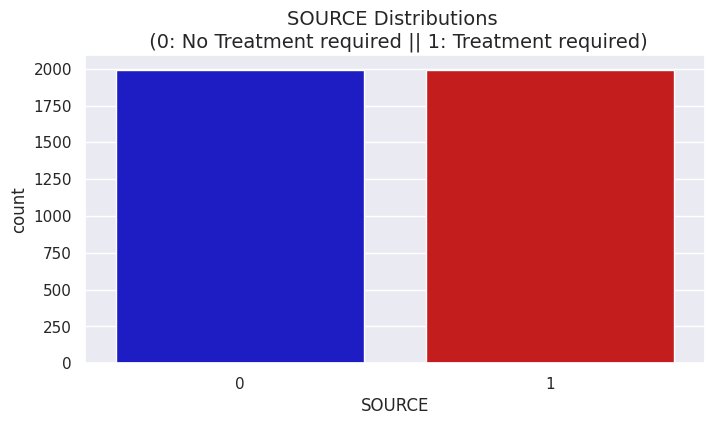

In [ ]:
# displaying the count of SOURCE column

width = 8
height = 4
sns.set(rc = {'figure.figsize':(width,height)})

colors = ["#0101DF", "#DF0101"]

sns.countplot(x=Y_ovr_samp, data=df, palette=colors)
plt.title('SOURCE Distributions \n (0: No Treatment required || 1: Treatment required)' , fontsize=14) #


In [ ]:
len(X_ovr_samp)

3984

In [ ]:
len(Y_ovr_samp)

3984

In [ ]:
print(X_ovr_samp.shape)
print(Y_ovr_samp.shape)

(3984, 10)
(3984,)


In [ ]:
# spliting the over sampled dataset into Train and Test based on 70:30 ratio

X_train1,X_test1,y_train1,y_test1 = train_test_split(X_ovr_samp, Y_ovr_samp, test_size=0.3, random_state=10)

In [ ]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training set and transform the "Amount" feature
X_train1 = scaler.fit_transform(X_train1)

# Transform the "Amount" feature in the test set
X_test1 = scaler.transform(X_test1)

In [ ]:
X_train1

array([[ 0.05613234, -0.49115216,  0.7444889 , ..., -1.40698573,
        -2.09965138, -1.00936957],
       [ 1.76451709,  1.36840859,  1.68990396, ..., -0.2020204 ,
         0.07041675,  0.9907174 ],
       [ 1.4327919 ,  1.2730465 ,  1.93264566, ..., -1.0797112 ,
        -1.03770315,  0.9907174 ],
       ...,
       [ 0.85227281,  0.74855501,  0.32288488, ...,  0.86905988,
        -1.36090478,  0.9907174 ],
       [ 0.66982395,  0.93927918,  0.97445472, ..., -0.73756055,
        -1.77644974,  0.9907174 ],
       [-0.98880202, -0.96796261, -0.77584073, ..., -0.3954099 ,
        -0.52981486,  0.9907174 ]])

# Logistic Regression

In [ ]:
# instantiate Logistic regression and Fit it

logr=LogisticRegression()
logr.fit(X_train1,y_train1)

LogisticRegression()

In [ ]:
# making the model learn

y1_pred=logr.predict(X_test1)

In [ ]:
accuracy_score(y_test1,y1_pred)

0.6956521739130435

In [ ]:
f1_score(y_test1,y1_pred)

0.689419795221843

# GRID SEARCH

In [ ]:
#Applying Grid Search to find the best parameter for our Logistic Regression


# defin hyperparameter to search over
params = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs']
}

# perform Grid search over the hyperparameter

grd_src=GridSearchCV(logr,param_grid=params,scoring='f1',cv=10)
grd_src.fit(X_train1,y_train1)

# print the best hyperparameter and F1 score

print('Best hyperParam:',grd_src.best_params_)
print('F1 Score:',grd_src.best_score_)

Best hyperParam: {'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}
F1 Score: 0.6779678484907143


## Applying K-fold cross-validation to our Logistic Regression

In [ ]:
# no. of folds for k-fold cross validation

k=10

# define k-fold cross validation object

kf= KFold(n_splits=k,shuffle=True,random_state=10)

# perform k-fold cross validation on the model

f1_scores=cross_val_score(logr,X_train1,y_train1,cv=kf,scoring='f1')

print('Mean F1 score:',f1_scores.mean())
print('Standard Deviation:',f1_scores.std())

Mean F1 score: 0.6737176856716633
Standard Deviation: 0.05222339580408591


## Applying Random Forest Classifier to our model

# Random Forest

In [ ]:
# Instantiate Random Forest Model and Fit it

rfm=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=10)
rfm.fit(X_train1,y_train1)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=10)

In [ ]:
# making the model Learn

y_pred2=rfm.predict(X_test1)

In [ ]:
accuracy_score(y_test1,y_pred2)

0.7399665551839465

In [ ]:
f1_score(y_test1,y_pred2)

0.7259911894273128

# Decision Tree

In [ ]:
# Instantiate Random Forest Model and Fit it

tree = DecisionTreeClassifier()

In [ ]:
tree.fit(X_train1,y_train1) # NOTE we need not need to change the absent/present in y , else in other model we need to do that first

DecisionTreeClassifier()

In [ ]:
pred = tree.predict(X_test1)
pred

array([1, 0, 0, ..., 1, 1, 0])

In [ ]:
print(classification_report(y_test1,pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67       591
           1       0.68      0.67      0.67       605

    accuracy                           0.67      1196
   macro avg       0.67      0.67      0.67      1196
weighted avg       0.67      0.67      0.67      1196



## We came up to a conclusion that before over sampling and After over sampling Random Forest Classifier performs better than other model